# Importing necessary materials

In [123]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import cv2
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping
from emnist import list_datasets
from emnist import extract_training_samples 
from emnist import extract_test_samples
from tensorflow.keras.models import Sequential #importing seqential to make a sequencial model 
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D #importing other needed libraies from layers
list_datasets() #printing the list datasets in EMNIST to see which one to use

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

# Getting the trian and test data

In [124]:
images, labels = extract_training_samples('letters') #getting the training samples from the letters dataset 
test_images, test_labels = extract_test_samples('letters') #getting the testing samples from the letters dataset 

# Processing the data/ feature engineering

In [125]:
images = images.reshape(images.shape[0], 28, 28, 1) #reshaping the images in the training sample to the greyscale format 
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1) #reshaping the images in the testing samples to the grayscale format

In [126]:
images = images/255 #reducing the size of the datsets so they aren't greater than 0 or 1 
test_images = test_images/255 #reducing the size of the datsets so they aren't greater than 0 or 1 

# Making the CNN

In [127]:
input_shape = (28, 28, 1) #setting the input shape to be the same value as the image 
model = Sequential() #creating a model of type sequential
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape)) #adding a Conv2D layer to the model input size to go over the image
model.add(MaxPooling2D(pool_size=(2, 2))) #adding max pooling to the model to differenciate light from dark colors
model.add(Flatten()) #flattening the model to make it a single array
model.add(Dense(128, activation=tf.nn.relu)) #adding a dense layer with 128 nuerons to the modle to get the next output layer using relu to prevent exponential growth
model.add(Dropout(0.2)) #adding a dropout to prevent overfitting
model.add(Dense(30,activation=tf.nn.softmax)) #adding another desnse layer with 30 nuerons using softmax to output a fit between 0 and 1 

# Compiling the CNN and running it for 10 epochs

In [128]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) #compiling the model 
model.fit(images, labels, epochs=10) #fitting the model and running it 10 times

Epoch 1/10
3900/3900 [==============================] - 57s 15ms/step - loss: 0.6745 - accuracy: 0.7924
Epoch 2/10
3900/3900 [==============================] - 65s 17ms/step - loss: 0.3897 - accuracy: 0.8747
Epoch 3/10
3900/3900 [==============================] - 67s 17ms/step - loss: 0.3262 - accuracy: 0.8933
Epoch 4/10
3900/3900 [==============================] - 70s 18ms/step - loss: 0.2890 - accuracy: 0.9043
Epoch 5/10
3900/3900 [==============================] - 75s 19ms/step - loss: 0.2648 - accuracy: 0.9108
Epoch 6/10
3900/3900 [==============================] - 82s 21ms/step - loss: 0.2470 - accuracy: 0.9160
Epoch 7/10
3900/3900 [==============================] - 89s 23ms/step - loss: 0.2310 - accuracy: 0.9207
Epoch 8/10
3900/3900 [==============================] - 91s 23ms/step - loss: 0.2155 - accuracy: 0.9241
Epoch 9/10
3900/3900 [==============================] - 98s 25ms/step - loss: 0.2062 - accuracy: 0.9276
Epoch 10/10
3900/3900 [==============================] - 103s 26

# Evaluating the model for accuracy

In [129]:
model.evaluate(test_images, test_labels) #evaulating the model to get its accuracy

650/650 [==============================] - 8s 11ms/step - loss: 0.2831 - accuracy: 0.9187


[0.28305670619010925, 0.9187019467353821]

# Loading and word counting the first phrase

In [130]:
root, directory, files = next(os.walk("/Users/katewalker/desktop/senior-year-semester1/machinelearning/JuypterLab/sample1"))
#walking through the files in the folder for the first phrase
files.sort()
files.remove('.DS_Store') #removing autogenerated file
print(files) #printing the files in the folder

['00.jpg', '01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg']


added images to the phrase


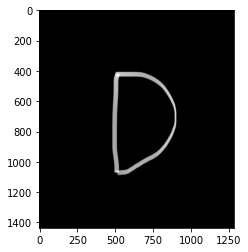

In [144]:
#processing the scanned in images
handwriting= [] #array to hold the phrase 
for i in range(len(files)):#walking through each file in the directory 
    img = cv2.imread("/Users/katewalker/desktop/senior-year-semester1/machinelearning/JuypterLab/sample1/"+files[i],cv2.IMREAD_GRAYSCALE)
    #setting the img to be the next file in the directory
    handwriting.append(img) #appending the image to the array 
    
print("added images to the phrase") #printing a message to know all files have been added 

plt.imshow(handwriting[10],cmap = 'gray') #showing the image at a specific index


added images to processed array


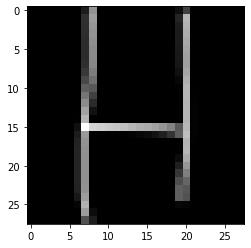

In [145]:
processed_handwriting = [] #array to hold the processed phrase

for img in handwriting: #looping through each image in the handwritten phrase array
    points = cv2.findNonZero(img) #getting the width and the height
    x, y, w, h = cv2.boundingRect(points) #drawing an approximate rectagle around the part of the image containing the letter
    #cropping the image to fit the size of the rectangle
    if (w > 0 and h > 0):
        if w > h:
            y = y - (w-h)//2 
            img = img[y:y+w, x:x+w]
        else:
            x = x - (h-w)//2 
            img = img[y:y+h, x:x+h] 
    img = cv2.resize(img, (28,28), interpolation = cv2.INTER_AREA) #resize the image to be 28X28 and shrink the image down 
    processed_handwriting.append(img) #add the image to the array 

print("added images to processed array") #print statement to know loop is done

plt.imshow(processed_handwriting[0],cmap = 'gray') #showing image at a specified index

In [146]:
spaces = 0 #intializing spaces to 0 
words = 1 #intializing words to 1

for char in processed_handwriting: #looping throught each letter
    num_pixels = 0 
    for j in range(28): #looping through the pixels
        for k in range(28):
            num_pixels += char[j,k] #adding each pixel to the overall value
    if num_pixels < 20: #if the pixel value is less than 20 
        spaces = spaces + 1 #then the character is a space 
        words = words + 1 #increment word count
        
#printing the results
print("total spaces:")
print(spaces)
print("word count")
print(words)

total spaces:
1
word count
2


# Loading and word counting the second phrase

In [147]:
root, directory, files = next(os.walk("/Users/katewalker/desktop/senior-year-semester1/machinelearning/JuypterLab/sample2"))
#walking through the files in the folder for the first phrase
files.sort()
files.remove('.DS_Store') #removing autogenerated file
print(files) #printing the files in the folder

['00.jpg', '01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg', '36.jpg']


added images to the phrase


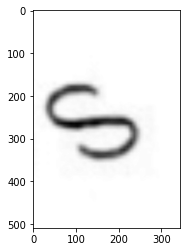

In [187]:
#processing the scanned in images
handwriting2= [] #array to hold the phrase 
for i in range(len(files)):#walking through each file in the directory 
    img = cv2.imread("/Users/katewalker/desktop/senior-year-semester1/machinelearning/JuypterLab/sample2/"+files[i],cv2.IMREAD_GRAYSCALE)
    #setting the img to be the next file in the directory
    handwriting2.append(img) #appending the image to the array 
    
print("added images to the phrase") #printing a message to know all files have been added 

plt.imshow(handwriting2[36],cmap = 'gray') #showing the image at a specific index

added images to processed array


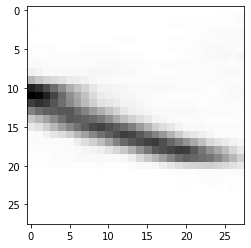

In [188]:
processed_handwriting2 = [] 

for img in handwriting2: 
    points = cv2.findNonZero(img) 
    x, y, w, h = cv2.boundingRect(points) 
    if (w > 0 and h > 0): 
        if w > h:
            y = y - (w-h)//2 
            img = img[y:y+w, x:x+w]
        else:
            x = x - (h-w)//2
            img = img[y:y+h, x:x+h] 
    img = cv2.resize(img, (28,28), interpolation = cv2.INTER_AREA) 
    processed_handwriting2.append(img)

print("added images to processed array") 

plt.imshow(processed_handwriting2[0],cmap = 'gray')

In [189]:
spaces2 = 0
words2 = 1

for char2 in processed_handwriting2: 
    num_pixels2 = 0 
    for j in range(28):
        for k in range(28):
            num_pixels2 += char2[j,k]
    if num_pixels2 < 20: 
        spaces2 = spaces2 + 1 
        words2 = words2 + 1 
#printing the results
print("total spaces:")
print(spaces2)
print("word count:")
print(words2)

total spaces:
4
word count:
5
